In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Importing the necessary modules
import sys
import os
sys.path.append('../src')  # Add scripts directory to the Python path

from database import load_data


# Get the project root directory (one level up from the current directory)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)

from src.user_overview import Analyzer

In [8]:
# Load data from the PostgreSQL database
query = """
    SELECT 
        "Bearer Id", "Start", "End", "Dur. (ms)", "IMSI", "MSISDN/Number", "IMEI", 
        "Last Location Name", "Avg RTT DL (ms)", "Avg RTT UL (ms)", "Avg Bearer TP DL (kbps)",
        "Avg Bearer TP UL (kbps)", "TCP DL Retrans. Vol (Bytes)", "TCP UL Retrans. Vol (Bytes)",
        "DL TP < 50 Kbps (%)", "50 Kbps < DL TP < 250 Kbps (%)", "250 Kbps < DL TP < 1 Mbps (%)",
        "DL TP > 1 Mbps (%)", "UL TP < 10 Kbps (%)", "10 Kbps < UL TP < 50 Kbps (%)", 
        "50 Kbps < UL TP < 300 Kbps (%)", "UL TP > 300 Kbps (%)", "HTTP DL (Bytes)", 
        "HTTP UL (Bytes)", "Activity Duration DL (ms)", "Activity Duration UL (ms)", 
        "Handset Manufacturer", "Handset Type", "Social Media DL (Bytes)", "Social Media UL (Bytes)",
        "Google DL (Bytes)", "Google UL (Bytes)", "Email DL (Bytes)", "Email UL (Bytes)", 
        "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)", "Netflix UL (Bytes)",
        "Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)", "Other UL (Bytes)", 
        "Total DL (Bytes)", "Total UL (Bytes)"
    FROM "xdr_data"
"""

In [9]:
# Load data using load_data
df = load_data(query)

# Standardize column names
try:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    print("Standardized columns:", df.columns)
except Exception as e:
    print(f"Error standardizing columns: {e}")
    exit()

/home/elisha-a/week2/notebooks/../src/database.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Data loaded with shape: (150001, 44)
Standardized columns: Index(['bearer_id', 'start', 'end', 'dur._(ms)', 'imsi', 'msisdn/number',
       'imei', 'last_location_name', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)',
       'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'handset_manufacturer', 'handset_type',
       'social_media_dl_(bytes)', 'social_media_ul_(bytes)',
       'google_dl_(bytes)', 'google_ul_(bytes)', 'email_dl_(bytes)',
       'email_ul_(bytes)', 'youtube_dl_(bytes)', 'youtube_ul_(bytes)',
       'netflix_dl_(bytes)', 'netflix_ul_(bytes)', 'gamin

Data loaded successfully!


/home/elisha-a/week2/src/user_overview.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.values, y=top_handsets.index, palette="viridis")


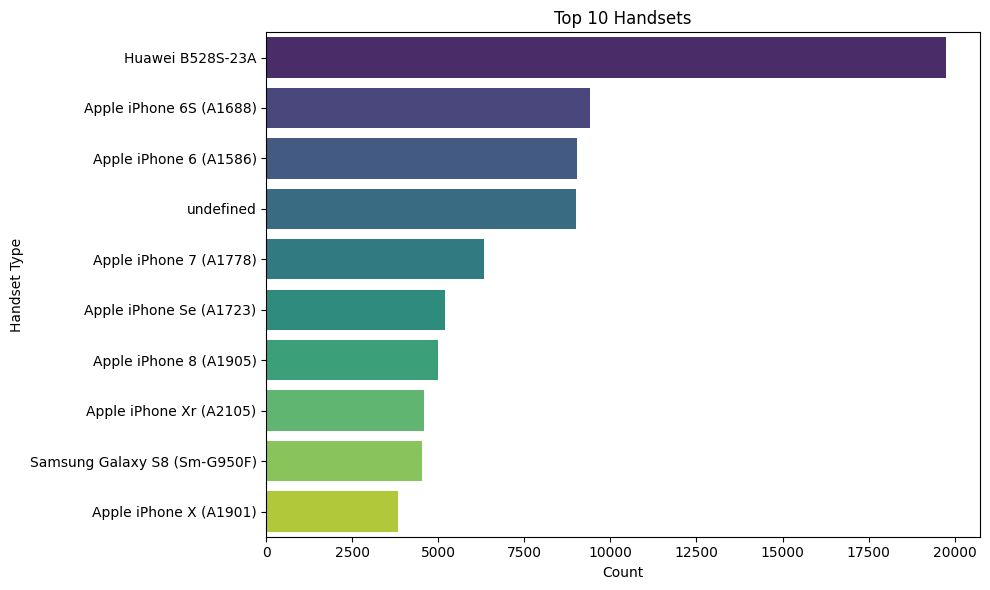

/home/elisha-a/week2/src/user_overview.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette="cubehelix")


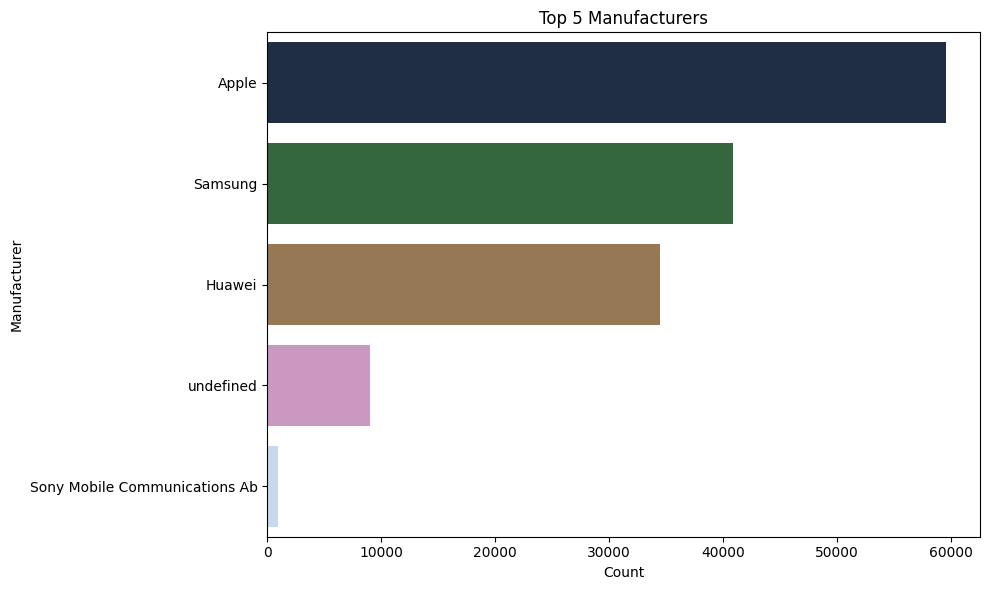

plot_session_duration method called


KeyError: "Column 'session_duration' is missing from the DataFrame."

In [10]:
# Perform analysis and visualization
if df is not None:
    print("Data loaded successfully!")

    # Plot the top handsets
    Analyzer.plot_top_handsets(df, n=10)

    # Plot the top manufacturers
    Analyzer.plot_top_manufacturers(df, n=5)

    # Check if methods exist before calling
    if hasattr(Analyzer, 'plot_session_duration'):
        Analyzer.plot_session_duration(df)

    if hasattr(Analyzer, 'plot_total_data_volume'):
        Analyzer.plot_total_data_volume(df)

    if hasattr(Analyzer, 'plot_application_usage'):
        Analyzer.plot_application_usage(df, application_column='app_name', data_column='total_data_volume')
else:
    print("Failed to load data.")
